In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, datasets, regularizers
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_docs.plots
import tensorflow as tf
import numpy as np
import keras_tuner
import tensorboard
import tempfile
import pathlib
import os

2023-07-25 16:25:44.496528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/caiomarchiorato/Desktop/cotton_classification/venv/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Image Augmentation

In [ ]:
from image_augmentation.data_augmentation import ImageDataAugmentation

classes  = ["classe1","classe2","classe3","classe4","classe5"]
data_dir = "tlinter_otsu/"

data_augmentation = ImageDataAugmentation(classes= classes,
                                          path = data_dir,
                                          num_batches = 1)

data_augmentation.image_augmentation()

# Model Tuner

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from model_otimization.model_tuner import ModelTuner
from model_otimization.build_hypermodel import BuildHypermodel

#construindo o modelos com parametros ajustaveis
hypermodel = BuildHypermodel()
model_tuner = ModelTuner(image_size= 128, path= "tuner")


train_data_dir = "to_torch/train/"
valid_data_dir = "to_torch/valid/"

train_data = LoadData(path= train_data_dir, num_batches= 1, image_size = 500)

valid_data = LoadData(path= valid_data_dir, num_batches= 1, image_size = 500)

train_data = train_data.get_data()
valid_data = valid_data.get_data()

tuned_model = model_tuner.tuner_bayesian_optimization(model = hypermodel, objective= "val_acc", training_Data=train_data, 
                                         valid_Data= valid_data,  epochs= 1, max_trials = 1)

Found 447 files belonging to 5 classes.
Found 25 files belonging to 5 classes.
A pasta já existe
INFO:tensorflow:Reloading Tuner from tuner/bayesian_optimization/tuner0.json
Search space summary
Default search space size: 9
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
conv_1_kernel (Choice)
{'default': 2, 'conditions': [], 'values': [2, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
conv_2_kernel (Choice)
{'default': 2, 'conditions': [], 'values': [2, 5], 'ordered': True}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
dense_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
dense_3_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'],

# Carregando e treinando

In [2]:
from load_data.load_data import LoadData

train_data_dir = "to_torch/train/"
valid_data_dir = "to_torch/valid/"

train_data = LoadData(path= train_data_dir,
                      num_batches= 1,
                      image_size = 500)

valid_data = LoadData(path= valid_data_dir,
                      num_batches= 1,
                      image_size = 500)

train_data = train_data.get_data()
valid_data = valid_data.get_data()

for image_batch, labels_batch in train_data:
    print("Image_size:",image_batch.shape[2])
    break

Found 447 files belonging to 5 classes.


Found 25 files belonging to 5 classes.


2023-07-25 16:25:56.474543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-25 16:25:56.474597: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Image_size: 500


2023-07-25 16:25:57.352844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [447]
	 [[{{node Placeholder/_0}}]]
2023-07-25 16:25:57.353449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [447]
	 [[{{node Placeholder/_4}}]]
2023-07-25 16:25:57.424871: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeli

In [3]:
import tensorflow as tf

model_lenet5_maxpooling = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(image_batch.shape[2], image_batch.shape[2], 3)),
    tf.keras.layers.Conv2D(6, (3, 3), activation='relu',strides= (2,2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    #TESTAR FUNÇAO SIGMOID (0)
    tf.keras.layers.Dense(5, activation='softmax')])

In [4]:
#compile and train
from compile_and_fit.compile_and_fit import CompilerAndFit

compile_fit = CompilerAndFit(train_Data= train_data,
               valid_Data = valid_data,
               path = "lenet5_l2",
               monitor = "acc")

In [5]:
history = compile_fit.compile_and_fit(model= model_lenet5_maxpooling,
                                      max_epochs = 50)

Tamanho dos Batchs (1,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 249, 249, 6)       168       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      880       
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 120)               29522040  
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (No

2023-07-25 16:26:02.478358: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-07-25 16:26:02.653818: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 1/50


/Users/caiomarchiorato/Desktop/cotton_classification/venv/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-07-25 16:26:03.638679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-25 16:26:03.720709: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


447/447 [==============================] - ETA: 0s - loss: 65.4185 - acc: 0.2170 - top5-acc: 0.4519

2023-07-25 16:26:33.114030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25]
	 [[{{node Placeholder/_4}}]]
2023-07-25 16:26:33.114489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25]
	 [[{{node Placeholder/_4}}]]
2023-07-25 16:26:33.247359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch: 0, acc:0.2170,  loss:65.4185,  top5-acc:0.4519,  val_acc:0.2000,  val_loss:108.7246,  val_top5-acc:0.6800,  
447/447 [==============================] - 32s 67ms/step - loss: 65.4185 - acc: 0.2170 - top5-acc: 0.4519 - val_loss: 108.7246 - val_acc: 0.2000 - val_top5-acc: 0.6800
Epoch 2/50
447/447 [==============================] - 30s 66ms/step - loss: 23.3067 - acc: 0.2148 - top5-acc: 0.4362 - val_loss: 49.4660 - val_acc: 0.2000 - val_top5-acc: 0.4000
Epoch 3/50
447/447 [==============================] - 29s 65ms/step - loss: 22.7501 - acc: 0.2170 - top5-acc: 0.3803 - val_loss: 39.6978 - val_acc: 0.2000 - val_top5-acc: 0.4000
Epoch 4/50
447/447 [==============================] - 29s 64ms/step - loss: 16.6576 - acc: 0.1834 - top5-acc: 0.3333 - val_loss: 36.1975 - val_acc: 0.2000 - val_top5-acc: 0.4000
Epoch 5/50
447/447 [==============================] - 29s 65ms/step - loss: 9.8132 - acc: 0.2931 - top5-acc: 0.5034 - val_loss: 15.1964 - val_acc: 0.2000 - val_top5-acc: 0.4000
Epoc

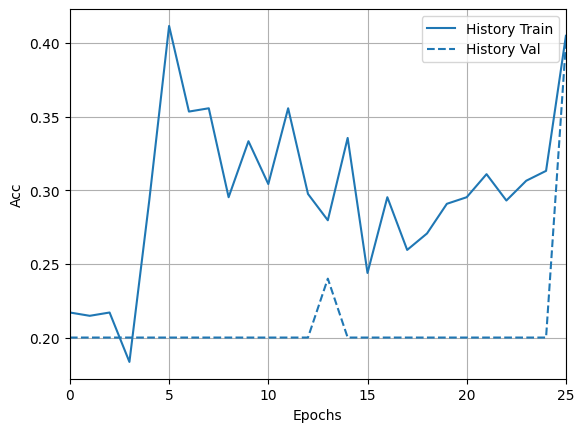

In [7]:
compile_fit.plot_acc(history)